### Importação dos dados



In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [10]:
# calculando o faturamento total de cada loja
faturamento_loja1 = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# exibindo o resultado do calculo de faturamento por loja, formatado com duas casas decimais
print(f"Faturamento total da Loja 1: R$ {faturamento_loja1:.2f}")
print(f"Faturamento total da Loja 2: R$ {faturamento_loja2:.2f}")
print(f"Faturamento total da Loja 3: R$ {faturamento_loja3:.2f}")
print(f"Faturamento total da Loja 4: R$ {faturamento_loja4:.2f}")

Faturamento total da Loja 1: R$ 1534509.12
Faturamento total da Loja 2: R$ 1488459.06
Faturamento total da Loja 3: R$ 1464025.03
Faturamento total da Loja 4: R$ 1384497.58


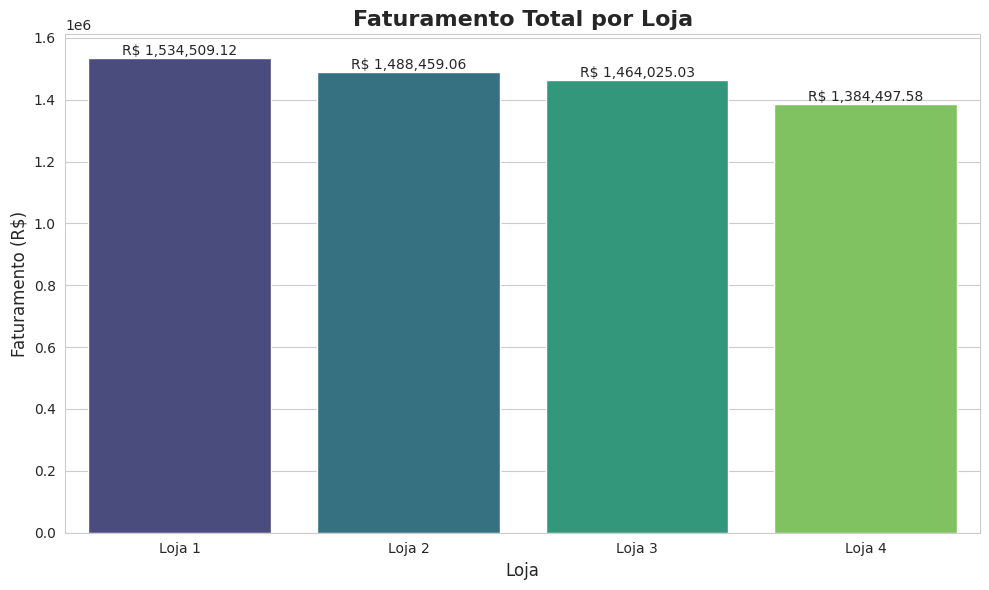

In [17]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns

# criando um dataframe para que o seaborn consiga gerar o gráfico
df_faturamento = pd.DataFrame({
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
})

# definindo o estilo e o tamanho do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# gerando o gráfico de barras e definindo a paleta de cores
sns.barplot(x="Loja", y="Faturamento", data=df_faturamento, hue="Loja", palette="viridis", dodge=False, legend=False)

# definindo o título e o nome dos eixos
plt.title("Faturamento Total por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)

# adicionando os rótulos de valores
for index, row in df_faturamento.iterrows():
    plt.text(index, row["Faturamento"] + 500, f"R$ {row['Faturamento']:,.2f}",
             ha='center', va='bottom', fontsize=10)

#ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [18]:
# agrupando e contando as categorias dos produtos vendidos por cada loja
categorias_loja1 = loja.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja2 = loja2.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja3 = loja3.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")
categorias_loja4 = loja4.groupby("Categoria do Produto")["Produto"].count().reset_index(name="Quantidade")

# exibindo as categorias mais populares de cada loja (do maior para o menor)
print("Categorias mais populares - Loja 1:")
print(categorias_loja1.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 2:")
print(categorias_loja2.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 3:")
print(categorias_loja3.sort_values(by="Quantidade", ascending=False), "\n")

print("Categorias mais populares - Loja 4:")
print(categorias_loja4.sort_values(by="Quantidade", ascending=False))

Categorias mais populares - Loja 1:
    Categoria do Produto  Quantidade
6                 moveis         465
2            eletronicos         448
0             brinquedos         324
1       eletrodomesticos         312
3        esporte e lazer         284
4  instrumentos musicais         182
5                 livros         173
7  utilidades domesticas         171 

Categorias mais populares - Loja 2:
    Categoria do Produto  Quantidade
6                 moveis         442
2            eletronicos         422
0             brinquedos         313
1       eletrodomesticos         305
3        esporte e lazer         275
4  instrumentos musicais         224
5                 livros         197
7  utilidades domesticas         181 

Categorias mais populares - Loja 3:
    Categoria do Produto  Quantidade
6                 moveis         499
2            eletronicos         451
0             brinquedos         315
1       eletrodomesticos         278
3        esporte e lazer         277


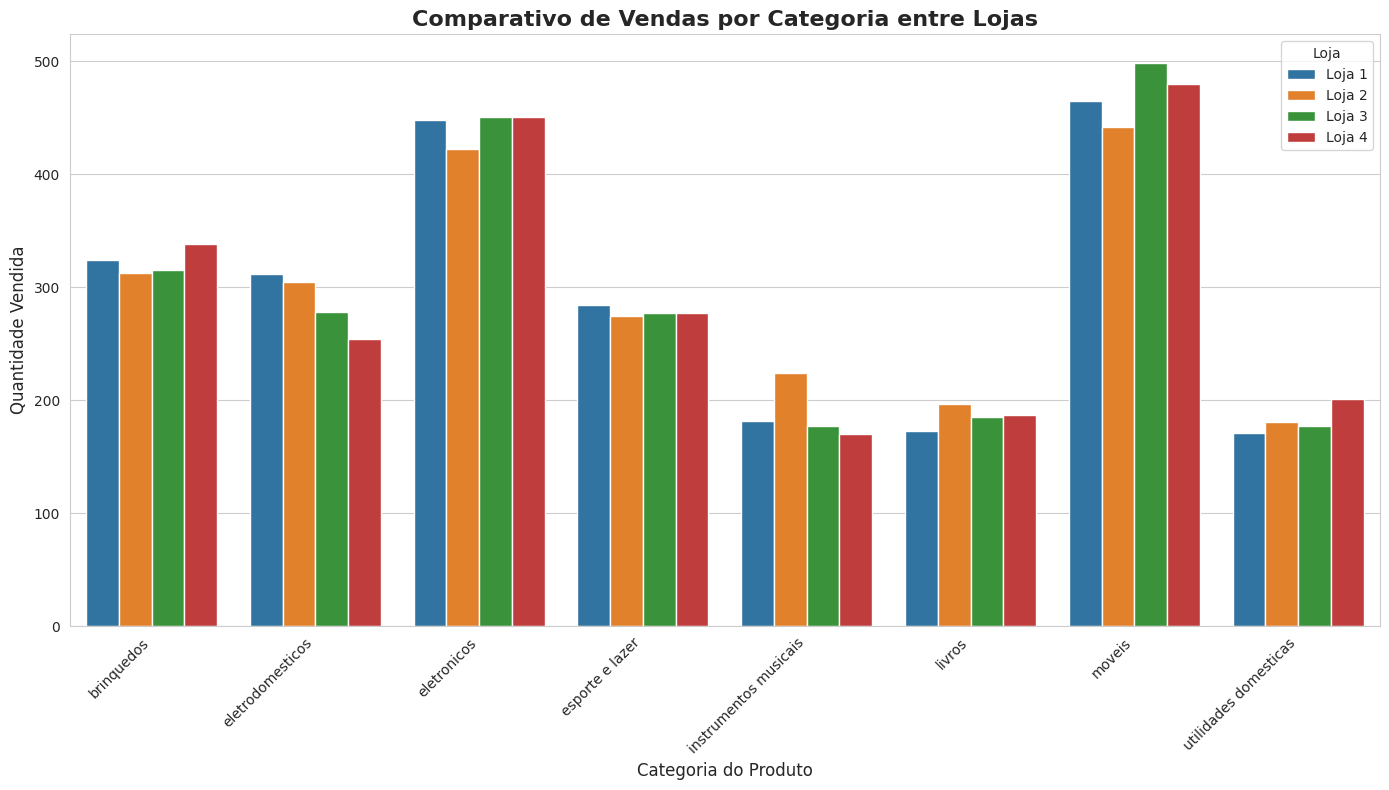

In [20]:
# importando as bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# criando a coluna que identifica cada loja
categorias_loja1["Loja"] = "Loja 1"
categorias_loja2["Loja"] = "Loja 2"
categorias_loja3["Loja"] = "Loja 3"
categorias_loja4["Loja"] = "Loja 4"

# concatenando os dataframes
todas_categorias = pd.concat([categorias_loja1, categorias_loja2, categorias_loja3, categorias_loja4])

# definindo o estilo e o tamanho do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# gerando o gráfico de barras comparativo
sns.barplot(data=todas_categorias, x="Categoria do Produto", y="Quantidade", hue="Loja")

# ajustando o layout
plt.title("Comparativo de Vendas por Categoria entre Lojas", fontsize=16, fontweight="bold")
plt.xlabel("Categoria do Produto", fontsize=12)
plt.ylabel("Quantidade Vendida", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Loja")
plt.tight_layout()

# exibindo o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

In [21]:
# calculando a média das avaliações de cada loja
media_avaliacoes = {
    "Loja 1": loja["Avaliação da compra"].mean(),
    "Loja 2": loja2["Avaliação da compra"].mean(),
    "Loja 3": loja3["Avaliação da compra"].mean(),
    "Loja 4": loja4["Avaliação da compra"].mean()
}

# transformando em dataframe para poder gerar a visualização
df_avaliacoes = pd.DataFrame(list(media_avaliacoes.items()), columns=["Loja", "Média de Avaliação"])
df_avaliacoes["Média de Avaliação"] = df_avaliacoes["Média de Avaliação"].round(2)

# exibindo as médias
print(df_avaliacoes)

     Loja  Média de Avaliação
0  Loja 1                3.98
1  Loja 2                4.04
2  Loja 3                4.05
3  Loja 4                4.00


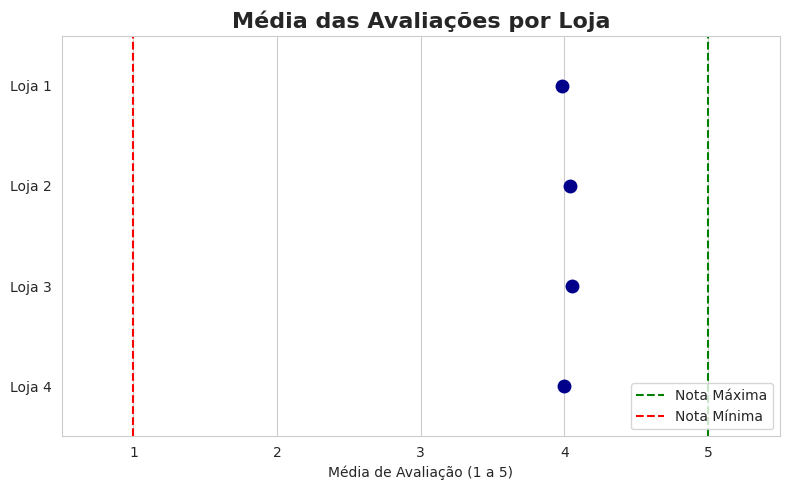

In [22]:
# importanto as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# definindo o estilo e tamanho do gráfico
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

# gerando o gráfico de pontos e definindo as cores
sns.stripplot(data=df_avaliacoes, x="Média de Avaliação", y="Loja", size=10, color="darkblue")

# adicionando linhas de referência
plt.axvline(5, color='green', linestyle='--', label='Nota Máxima')
plt.axvline(1, color='red', linestyle='--', label='Nota Mínima')

# adicionando rótulos e títulos
plt.title("Média das Avaliações por Loja", fontsize=16, fontweight='bold')
plt.xlabel("Média de Avaliação (1 a 5)")
plt.ylabel("")

# ajustando o layout e exibindo o gráfico
plt.xlim(0.5, 5.5)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [24]:
# identificando o produto mais e o menos vendido por loja

produtos_loja1 = loja.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja1 = produtos_loja1.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja2 = loja2.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja2 = produtos_loja2.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja3 = loja3.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja3 = produtos_loja3.sort_values(by="Quantidade Vendida", ascending=False)

produtos_loja4 = loja4.groupby("Produto")["Quantidade de parcelas"].sum().reset_index(name="Quantidade Vendida")
produtos_loja4 = produtos_loja4.sort_values(by="Quantidade Vendida", ascending=False)

# exibindo os cinco produtos mais vendidos e os cinco menos vendidos por loja
print("Loja 1 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja1.head(5))
print("Menos vendidos:")
print(produtos_loja1.tail(5), "\n")

print("Loja 2 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja2.head(5))
print("Menos vendidos:")
print(produtos_loja2.tail(5), "\n")

print("Loja 3 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja3.head(5))
print("Menos vendidos:")
print(produtos_loja3.tail(5), "\n")

print("Loja 4 - Produtos mais e menos vendidos:")
print("Mais vendidos:")
print(produtos_loja4.head(5))
print("Menos vendidos:")
print(produtos_loja4.tail(5))

Loja 1 - Produtos mais e menos vendidos:
Mais vendidos:
               Produto  Quantidade Vendida
43  Secadora de roupas                 214
47       TV Led UHD 4K                 196
17              Cômoda                 188
27          Impressora                 182
2            Bicicleta                 178
Menos vendidos:
           Produto  Quantidade Vendida
15  Corda de pular                 100
48     Tablet ABXY                  99
19  Dinossauro Rex                  94
38         Mochila                  90
11    Celular ABXY                  78 

Loja 2 - Produtos mais e menos vendidos:
Mais vendidos:
                     Produto  Quantidade Vendida
28  Iniciando em programação                 223
12          Celular Plus X42                 195
49                    Violão                 183
37               Micro-ondas                 179
43        Secadora de roupas                 177
Menos vendidos:
              Produto  Quantidade Vendida
42           Poltrona     

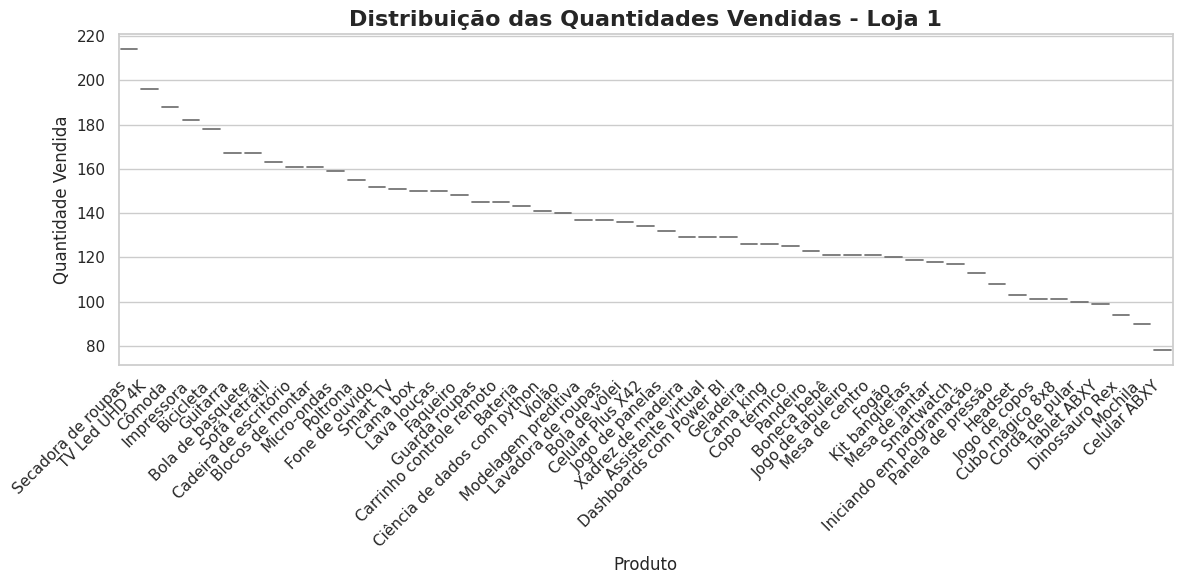

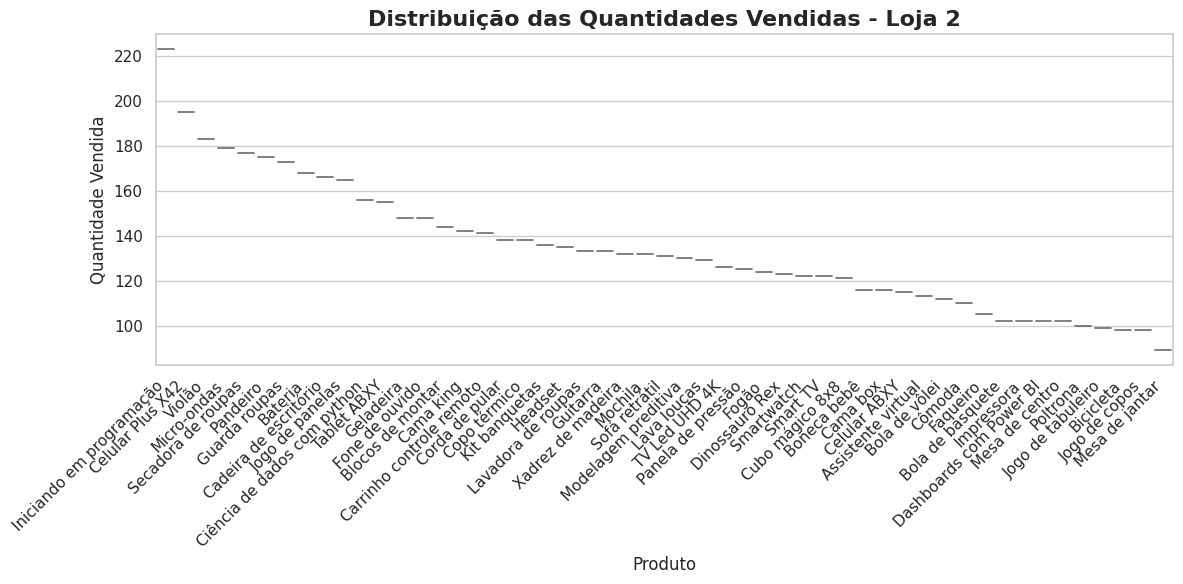

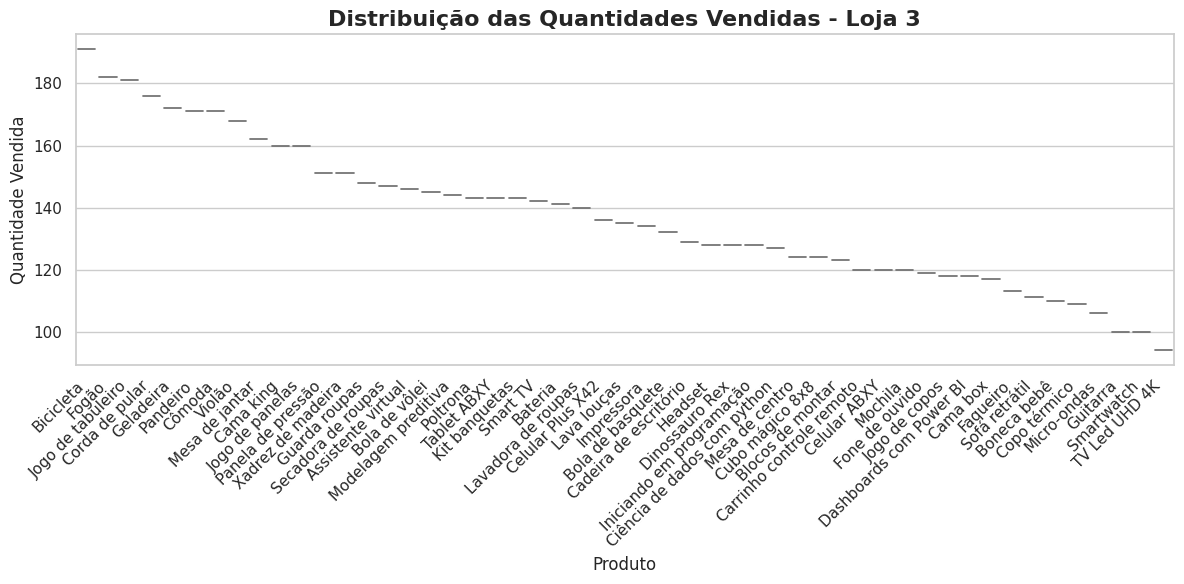

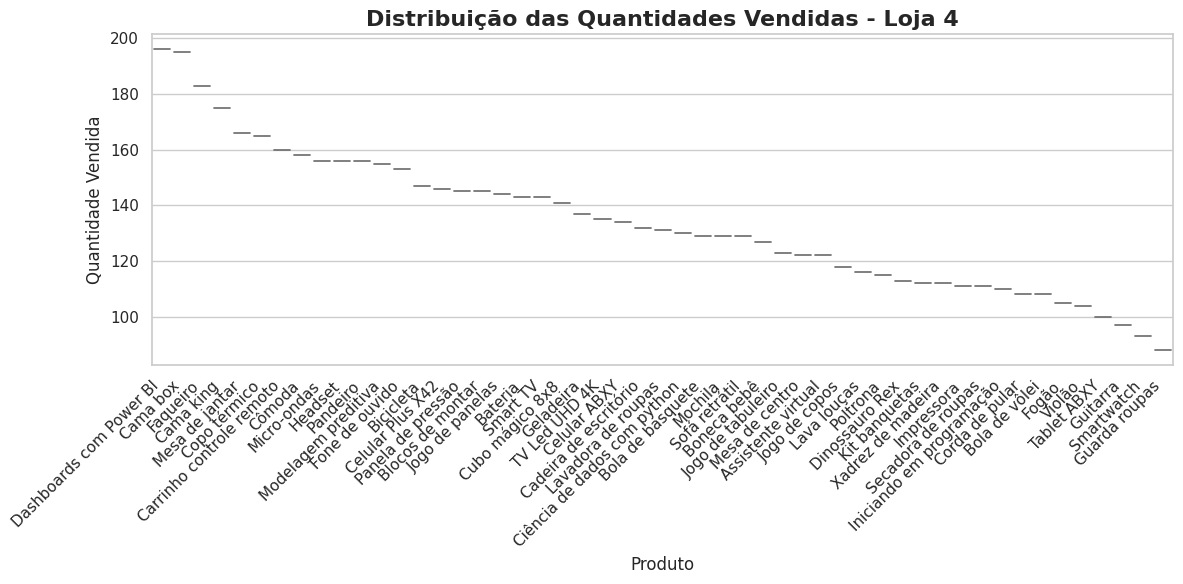

In [27]:
# importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# definindo o tamanho e estilo do gráfico
def grafico_violin(loja_data, nome_loja):
    plt.figure(figsize=(12, 6))
    sns.set_theme(style="whitegrid")

    # criando o gráfico de violino
    sns.violinplot(x="Produto", y="Quantidade Vendida", data=loja_data, inner="point", color="skyblue")

    # ajustando o layout e adicionando os títulos
    plt.title(f"Distribuição das Quantidades Vendidas - {nome_loja}", fontsize=16, fontweight="bold")
    plt.xlabel("Produto", fontsize=12)
    plt.ylabel("Quantidade Vendida", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# gerando um gráfico para cada loja
grafico_violin(produtos_loja1, "Loja 1")
grafico_violin(produtos_loja2, "Loja 2")
grafico_violin(produtos_loja3, "Loja 3")
grafico_violin(produtos_loja4, "Loja 4")

# 5. Frete Médio por Loja


In [28]:
# calculando a média do valor de frete de cada loja
media_frete = {
    "Loja 1": loja["Frete"].mean(),
    "Loja 2": loja2["Frete"].mean(),
    "Loja 3": loja3["Frete"].mean(),
    "Loja 4": loja4["Frete"].mean()
}

# gerando dataframe para conseguir fazer a visualização
df_frete = pd.DataFrame(list(media_frete.items()), columns=["Loja", "Custo Médio de Frete"])
df_frete["Custo Médio de Frete"] = df_frete["Custo Médio de Frete"].round(2)

# exibindo o resultado da média
print(df_frete)

     Loja  Custo Médio de Frete
0  Loja 1                 34.69
1  Loja 2                 33.62
2  Loja 3                 33.07
3  Loja 4                 31.28


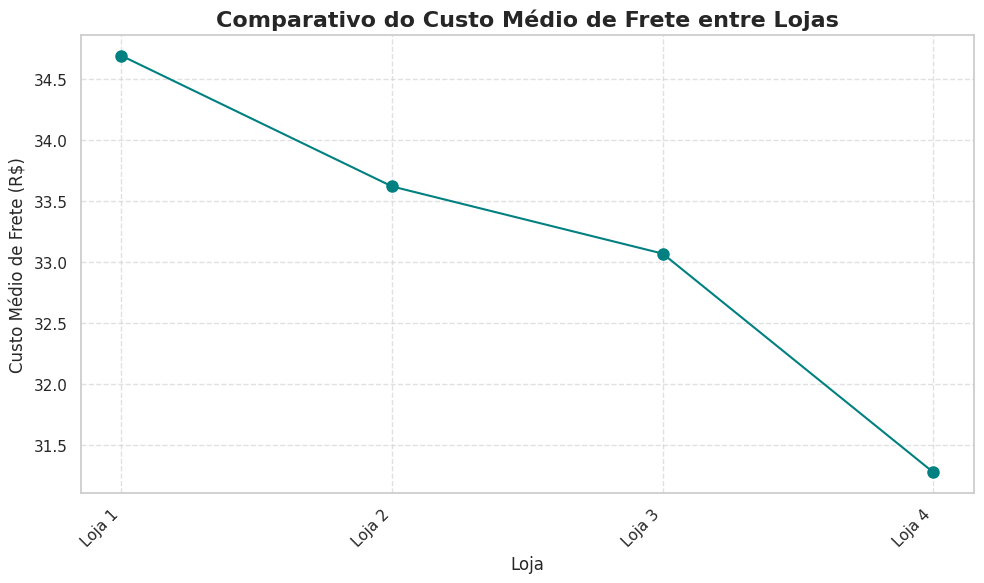

In [29]:
# importando a biblioteca necessária
import matplotlib.pyplot as plt

# definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# gerando o gráfico de linhas
plt.plot(df_frete["Loja"], df_frete["Custo Médio de Frete"], marker="o", linestyle='-', color="teal", markersize=8)

# adicionando o título e os rótulos
plt.title("Comparativo do Custo Médio de Frete entre Lojas", fontsize=16, fontweight="bold")
plt.xlabel("Loja", fontsize=12)
plt.ylabel("Custo Médio de Frete (R$)", fontsize=12)

# ajustando o layout
plt.xticks(rotation=45, ha="right")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

# exibindo o gráfico
plt.show()

# 6. Relatório Final


## Introdução

Foram analisadas as quatro lojas com base em dados diversos. O objetivo é identificar **qual loja apresenta o pior desempenho geral e, portanto, deve ser vendida**.

Os critérios usados para a avaliação foram:

- Faturamento total das lojas  
- Categorias de produtos mais e menos vendidas  
- Média das avaliações dos clientes  
- Produtos mais e menos vendidos  
- Custo médio do frete  

---

## Desenvolvimento

### 1. Faturamento Total

A **Loja 4** apresentou o **menor faturamento** entre todas, indicando baixa geração de receita e menor movimentação de vendas.

### 2. Categorias de Produtos Vendidas

Apesar de todas as lojas apresentarem cenários semelhates, a **Loja 3** demonstrou maior discrepância entre as categorias mais vendidas e o menos vendidas, o que pode ser indício de que a loja tem pouco potencial para vender uma diversidade de segmentos.

### 3. Média de Avaliação dos Clientes

A **Loja 1** teve o **pior desempenho em avaliações**, refletindo uma possível insatisfação dos clientes com os produtos, serviços ou ambos.

### 4. Produtos Mais e Menos Vendidos

Embora tenha alguns produtos com vendas regulares, a **Loja 3 possui muitos produtos com baixíssima saída**, sendo a loja que tem o menor topo de vendas entre os produtos mais vendidos e menor variação de vendas entre o mais e menos vendido o que sugere um mix de produtos menos atrativo para o público e falta de produtos que tenham destaque.

### 5. Custo Médio de Frete

A **Loja 1** possui o custo médio de frete mais caro entre as lojas o que pode ser um fator desencorajante para os consumidores.

---

## Conclusão

A **Loja 1** apresenta alguns problemas relacionados a baixa avaliação dos clientes e ao alto custo do frete, porém, considerando seu alto desempenho financeiro, não compensaria vender a loja.

**RECOMENDAÇÃO: VENDER A LOJA 3**

A **Loja 3** apresenta **desempenho pobre**, considerando:

- O **segundo menor faturamento**
- Um **mix de produtos pouco competitivo**
- **Baixo volume de vendas por categoria**

Apesar do frete mais barato, essa loja **não se mostra eficiente ou estratégica** dentro do portfólio do Senhor João. Portanto, recomendo que a **Loja 3 seja vendida**, permitindo o foco em unidades com maior retorno e potencial de crescimento e capacidade de investir em novos negócios.



# 7. Análise de Desempenho Geográfico

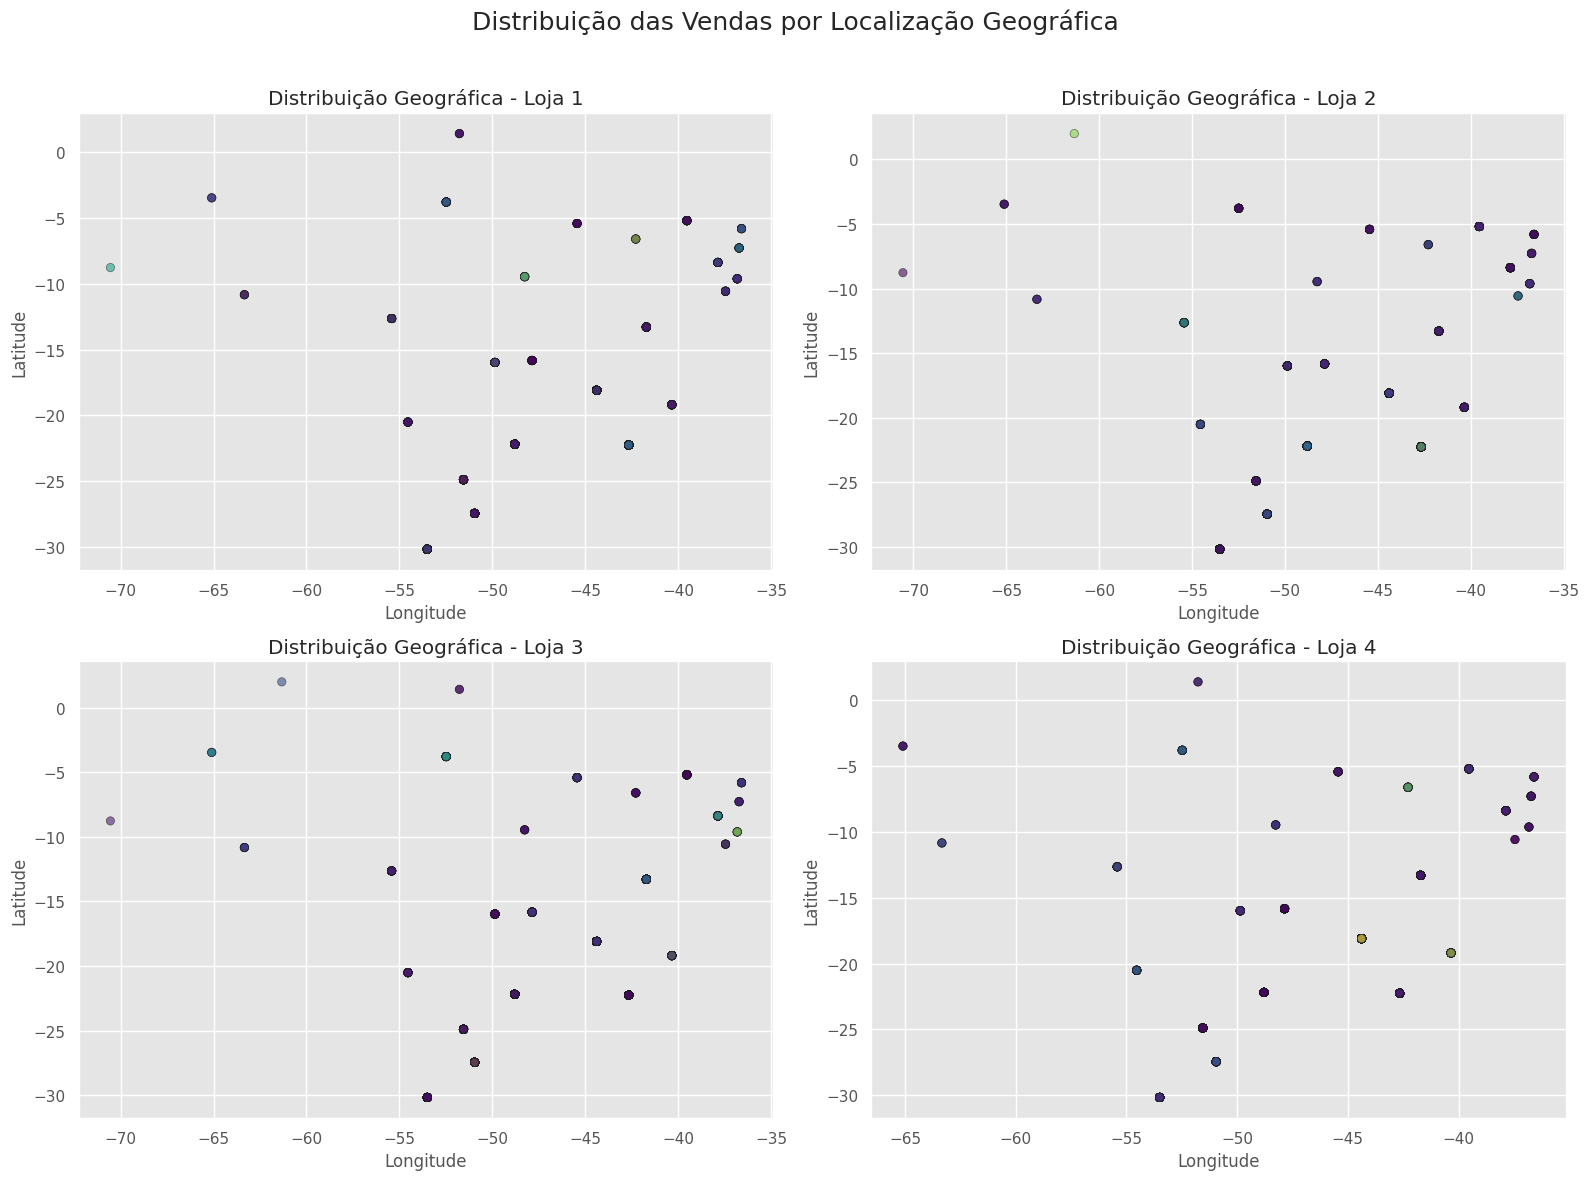

In [35]:
# importando a biblioteca necessária
import matplotlib.pyplot as plt

# definindo o tamanho e estilo do gráfico
plt.style.use("ggplot")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# gerando um gráfico de dispersão para cada loja

lojas = [(loja, "Loja 1"), (loja2, "Loja 2"), (loja3, "Loja 3"), (loja4, "Loja 4")]

axs = axs.flatten()
for i, (dados, nome) in enumerate(lojas):
    axs[i].scatter(dados["lon"], dados["lat"], alpha=0.6, c=dados["Preço"], cmap='viridis', edgecolor='k')
    axs[i].set_title(f"Distribuição Geográfica - {nome}")
    axs[i].set_xlabel("Longitude")
    axs[i].set_ylabel("Latitude")

# adicionando o título ao gráfico, ajustando o layout e exibindo o gráfico
plt.suptitle("Distribuição das Vendas por Localização Geográfica", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()